In [2]:
import numpy as np
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.manifold as skmf
import re
df =pd.read_csv("Case 1 _ Assignment 4_ Document Assessment & Plan Quiz Student Analysis Report.csv")
df
#data1=xl
#data1=xl.parse("",header=1)
#data1

,name,id,sis_id,section,section_id,section_sis_id,submitted,attempt,67161: What is your leading Differential Diagnosis?,1.0,...,1.0.13,67177: Medication – Neurological,1.0.14,67178: Inpatient Specialty Consultations,2.0,67179: Outpatient follow-up for discharged patients,1.0.15,n correct,n incorrect,score
0,Aheema Gazi,4209,agazi,July 26,3202,NaN,2023-07-26 12:36:15 UTC,1,Community Acquired Pneumonia,1.0,...,1.0,None,1.0,"Cardiologist,Respiratory Therapist",0.0,Primary Care Provider,1.0,10,9,14.0
1,Amro Mohamed,4223,amohamed,May 31,3169,NaN,2023-05-31 15:32:49 UTC,1,Community Acquired Pneumonia,1.0,...,0.0,None,1.0,"Osteopathic Manipulation,Respiratory Therapist",2.0,Primary Care Provider,1.0,9,10,13.0
2,Kristin Feickert,4172,kfeickert,May 31,3169,NaN,2023-05-31 15:22:13 UTC,1,Community Acquired Pneumonia,1.0,...,1.0,None,1.0,"Osteopathic Manipulation,Respiratory Therapist",2.0,Primary Care Provider,1.0,12,7,18.0
3,Cynthia Dillon,4156,cdillon01,May 31,3169,NaN,2023-05-31 15:17:19 UTC,1,Community Acquired Pneumonia,1.0,...,1.0,CIWA Protocol for alcohol withdrawal,0.0,"Osteopathic Manipulation,Respiratory Therapist",2.0,Primary Care Provider,1.0,8,11,14.0
4,Adriana Gomes,4114,agomes,May 31,3169,NaN,2023-05-31 15:13:02 UTC,1,Community Acquired Pneumonia,1.0,...,0.0,CIWA Protocol for alcohol withdrawal,0.0,"Infectious Disease,Respiratory Therapist",0.0,Primary Care Provider,1.0,9,10,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Evan Bischoff,4171,ebischoff,May 31,3169,NaN,2023-05-31 12:23:52 UTC,1,Community Acquired Pneumonia,1.0,...,0.0,None,1.0,"Infectious Disease,Respiratory Therapist",0.0,Primary Care Provider,1.0,7,12,12.0
175,Heather Brubaker,4187,hbrubaker,May 31,3169,NaN,2023-05-31 12:23:39 UTC,1,Community Acquired Pneumonia,1.0,...,1.0,None,1.0,"Osteopathic Manipulation,Respiratory Therapist",2.0,Primary Care Provider,1.0,12,7,20.0
176,Christopher Ciccone,4125,cciccone,May 31,3169,NaN,2023-05-31 12:22:03 UTC,1,Community Acquired Pneumonia,1.0,...,1.0,None,1.0,"Osteopathic Manipulation,Respiratory Therapist",2.0,Primary Care Provider,1.0,12,7,20.0
177,Gabriel Cox,4133,gcox01,May 31,3169,NaN,2023-05-31 12:21:38 UTC,1,Community Acquired Pneumonia,1.0,...,0.0,CIWA Protocol for alcohol withdrawal,0.0,"Infectious Disease,Respiratory Therapist",0.0,Primary Care Provider,1.0,11,8,18.0


<AxesSubplot:xlabel='score', ylabel='67178: Inpatient Specialty Consultations'>

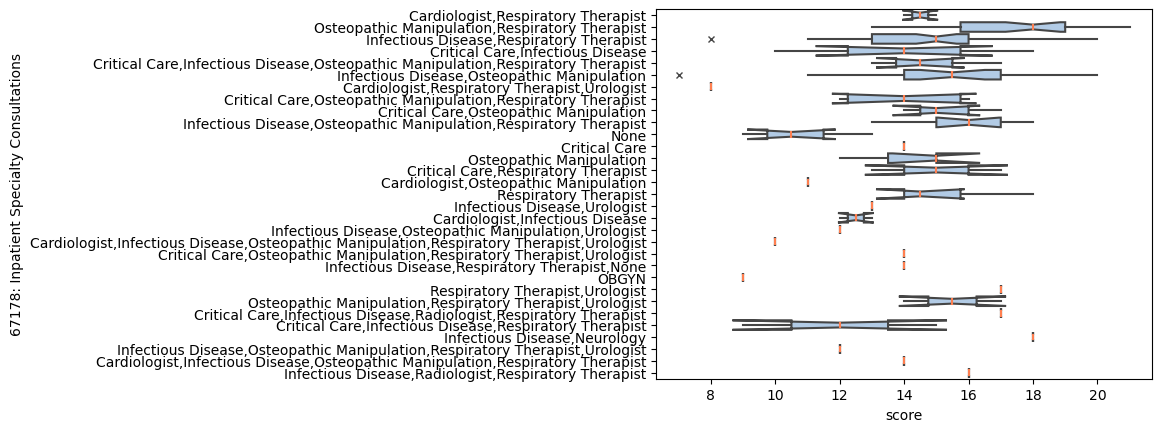

In [6]:
import seaborn as sns
summary_df = df.describe()
sns.boxplot(
    data=df, x="score", y="67178: Inpatient Specialty Consultations",
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
 
# Creating axes instance
bp = ax.boxplot(df, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
 
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['data_1', 'data_2',
                    'data_3', 'data_4'])
 
# Adding title
plt.title("Customized box plot")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
# show plot
plt.show()

In [13]:
import fpdf
from fpdf import FPDF
import time
import pandas as pd
import matplotlib.pyplot as plt
import dataframe_image as dfi

In [95]:
def create_letterhead(pdf, WIDTH):
    
    pdf.image("VCOM_logo.jpg", 0, 0, WIDTH)
    pdf.set_fill_color(102, 0, 51)
    pdf.rect(x = 1, y = 1, w = 208, h = 5, style = 'F')
def create_title(title, pdf):
    
    # Add main title
    pdf.set_font('Helvetica', 'b', 20)  
    pdf.ln(2)
    #pdf.write(10, title)
    pdf.cell(230,10,title, ln=1, align='C')
    pdf.ln(0)
    
    #Add student name
    pdf.set_font('Helvetica', '', 12)
    name= 'Student Name: '+ df['name'][0]
    pdf.cell(230,10,name, ln=1, align='C')
    pdf.ln(0)
    #Add PID
    pdf.set_font('Helvetica', '', 12)
    pid= "Student PID: "+ df['sis_id'][0]
    pdf.cell(230,10,pid, ln=1, align='C')
    pdf.ln(0)
    # Add date of report
    pdf.set_font('Helvetica', '', 12)
    pdf.set_text_color(r=128,g=128,b=128)
    today = time.strftime("%m/%d/%Y")
    #pdf.write(4, f'{today}')
    pdf.cell(230,10,f'{today}', ln=1, align='C')
    # Add line break
    pdf.ln(15)

def write_to_pdf(pdf, words):
    
    # Set text colour, font size, and font type
    pdf.set_text_color(r=0,g=0,b=0)
    pdf.set_font('Helvetica', '', 12)
    
    pdf.write(5, words)
class PDF(FPDF):

    def footer(self):
        self.set_y(-15)
        self.set_font('Helvetica', 'I', 8)
        self.set_text_color(128)
        self.cell(0, 10, 'Page ' + str(self.page_no()), 0, 0, 'C')

In [105]:
def generate_matplotlib_stackbars(df, filename):
    
    # Create subplot and bar
    fig, ax = plt.subplots()
    ax.plot(df['n incorrect'][0], df['score'][0], color="#E63946", marker='D') 

    # Set Title
    ax.set_title('Overall Performance', fontweight="bold")

    # Set xticklabels
    ax.set_xticklabels(df['n incorrect'].values, rotation=90)
    plt.xticks(df['n incorrect'].values)

    # Set ylabel
    ax.set_ylabel('Score') 
    ax.set_xlabel('N incorrect')
    # Save the plot as a PNG
    #plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
    #plt.show()
    
#def generate_matplotlib_piechart(df, filename):
    
    # Pie chart, where the slices will be ordered and plotted counter-clockwise:
    #labels = ["n correct", "n incorrect"]
    #sales_value = df[["n correct", "n incorrect"]].tail(1)
    
    # Colors
    #colors = ['#E63946','#F1FAEE','#A8DADC','#457B9D','#1D3557', '#9BF6FF']
    
    # Create subplot
    #fig, ax = plt.subplots()
    
    # Generate pie chart
    #ax.pie(sales_value, labels=labels, autopct='%1.1f%%', startangle=90, colors = colors)
    #ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Set Title
    #ax.set_title('Heicoders Academy 2016 Sales Breakdown', fontweight="bold")
    
    # Save the plot as a PNG
    #plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    
   # plt.show()

C:\Users\taylo\AppData\Local\Temp\ipykernel_460\64551759.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['n incorrect'].values, rotation=90)


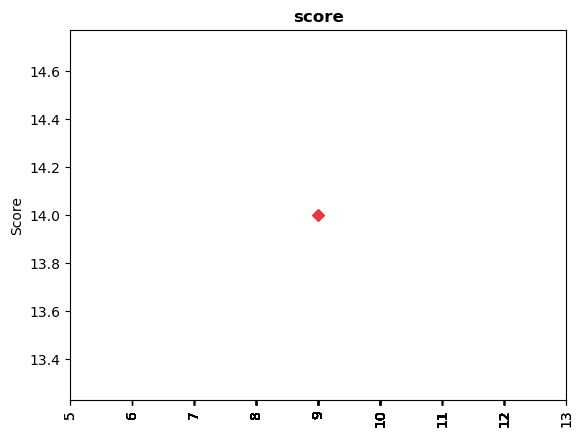

In [104]:
generate_matplotlib_stackbars(df, 'score.png')
#generate_matplotlib_piechart(df, 'pie.png')

In [106]:
TITLE = "Case Presentation 2024 Student Feedback Report"
WIDTH = 40
HEIGHT = 40

# Create PDF
pdf = PDF() # A4 (210 by 297 mm)


'''
First Page of PDF
'''
# Add Page
pdf.add_page()

# Add lettterhead and title
create_letterhead(pdf, WIDTH)
create_title(TITLE, pdf)

# Add some words to PDF
write_to_pdf(pdf, "1. Lexical Density:")
pdf.ln(15)

# Add table
#pdf.image("./resources/annual_sales.png", w=170)
pdf.ln(10)

# Add some words to PDF
write_to_pdf(pdf, "2. Total Correct Words:")
WIDTH2 = 210
# Add the generated visualisations to the PDF
pdf.image("score.png", 5, 130, WIDTH2/2-10)
#pdf.image("pie.png", WIDTH/2, 200, WIDTH/2-10)
pdf.ln(10)


'''
Second Page of PDF
'''

# Add Page
pdf.add_page()

# Add lettterhead

create_letterhead(pdf, WIDTH)

# Add some words to PDF
pdf.ln(60)
write_to_pdf(pdf, "3. ")
pdf.ln(15)

# Generate the PDF
pdf_name= df['name'][0]+"_CP_2024.pdf"
pdf.output(pdf_name, 'F')

''